## Importing necessary library

In [64]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

##  Fetching historical stock data

In [65]:
ticker_symbol = 'RELIANCE.BO'
reliance_stock = yf.Ticker(ticker_symbol)
historical_data = reliance_stock.history(period='10y')

## Resetting the index and format the date column

In [66]:
historical_data.reset_index(inplace=True)
historical_data['Date'] = historical_data['Date'].dt.strftime('%Y-%m-%d')
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

In [67]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2440 non-null   datetime64[ns]
 1   Open          2440 non-null   float64       
 2   High          2440 non-null   float64       
 3   Low           2440 non-null   float64       
 4   Close         2440 non-null   float64       
 5   Volume        2440 non-null   int64         
 6   Dividends     2440 non-null   float64       
 7   Stock Splits  2440 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 152.6 KB


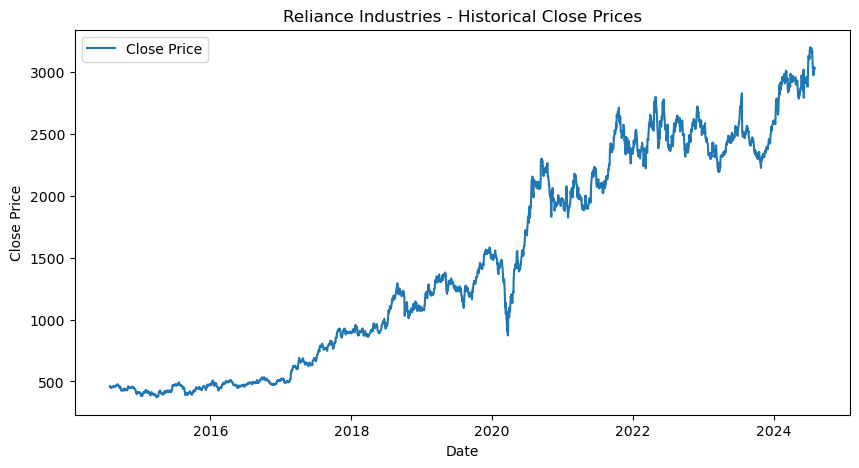

In [68]:
# Plotting the historical closing prices
plt.figure(figsize=(10,5))
plt.plot(historical_data['Date'], historical_data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Reliance Industries - Historical Close Prices')
plt.legend()
plt.show()

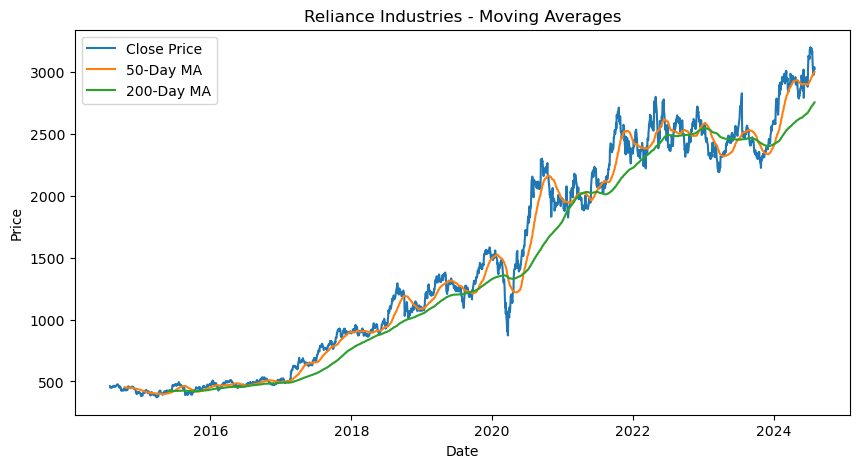

In [69]:
## Calculate and plot moving averages
historical_data['MA50'] = historical_data['Close'].rolling(window=50).mean()
historical_data['MA200'] = historical_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,5))
plt.plot(historical_data['Date'], historical_data['Close'], label='Close Price')
plt.plot(historical_data['Date'], historical_data['MA50'], label='50-Day MA')
plt.plot(historical_data['Date'], historical_data['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reliance Industries - Moving Averages')
plt.legend()
plt.show()

### The moving averages plot for Reliance Industries suggests a strong, long-term upward trend with the 50-day and 200-day moving averages acting as significant support levels. The presence of golden crosses indicates bullish phases, making this a positive outlook for long-term investment.

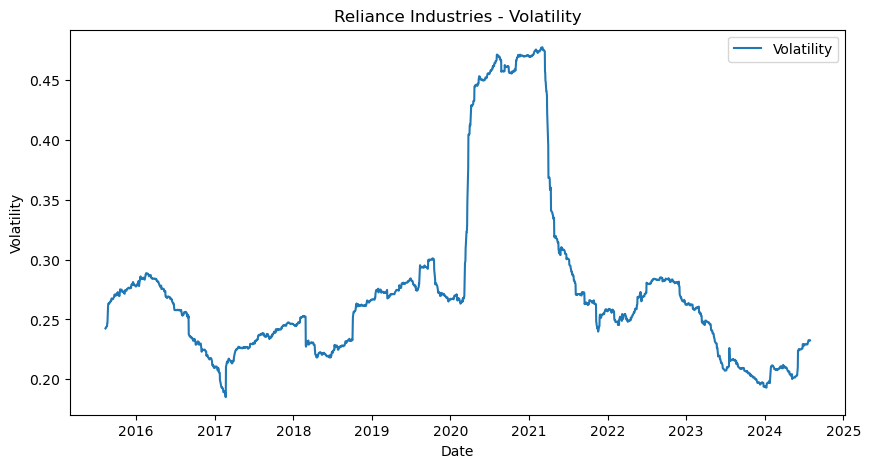

In [70]:
## Calculate and plot volatility
historical_data['Returns'] = historical_data['Close'].pct_change()
historical_data['Volatility'] = historical_data['Returns'].rolling(window=252).std() * (252**0.5)

plt.figure(figsize=(10, 5))
plt.plot(historical_data['Date'], historical_data['Volatility'], label='Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Reliance Industries - Volatility')
plt.legend()
plt.show()

## The volatility of Reliance Industries saw its highest peak during the COVID-19 pandemic, reflecting the market's reaction to global economic uncertainty. Since then, volatility has decreased but shows signs of increasing again towards 2024, indicating possible emerging uncertainties or market changes.

In [71]:
data=historical_data[['Date','Close']]

## Importing Some important Libraries

In [72]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

## Check for Stationarity using ADF and KPSS Tests

In [73]:
# ADF Test
adf_result = adfuller(data.Close)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# KPSS Test
kpss_result = kpss(data.Close, regression='c')
print(f'KPSS Statistic: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')

ADF Statistic: -0.17802996912175195
p-value: 0.9410902206363903
KPSS Statistic: 7.788520613337605
p-value: 0.01


C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## <b><font color='red'> ADF Test:</font></b>
#### Statistic: -0.17802
#### p-value: 0.9404
## <b><font color='green'>Since the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning the data is non-stationary according to the ADF test.</font></b>

## <b><font color='red'>KPSS Test:</font></b>
#### Statistic: 7.7885
#### p-value: 0.01
## <b><font color='green'>Since the p-value is less than 0.05, we reject the null hypothesis, meaning the data is non-stationary according to the KPSS test.</font></b>

## <b><font color='green'>Both tests confirm that the data is non-stationary. We need to make the data stationary by differencing it before proceeding with model fitting and forecasting.</font></b>

## <b><font color='red'>Make the Data Stationary</font></b>
#### Differencing the data can help make it stationary.

In [74]:
# Differencing the data
data['Differenced_Close'] = data['Close'].diff().dropna()

# Re-check stationarity
adf_result_diff = adfuller(data['Differenced_Close'].dropna())
print(f'ADF Statistic (Differenced): {adf_result_diff[0]}')
print(f'p-value (Differenced): {adf_result_diff[1]}')

kpss_result_diff = kpss(data['Differenced_Close'].dropna(), regression='c')
print(f'KPSS Statistic (Differenced): {kpss_result_diff[0]}')
print(f'p-value (Differenced): {kpss_result_diff[1]}')


ADF Statistic (Differenced): -29.559826651788484
p-value (Differenced): 0.0
KPSS Statistic (Differenced): 0.07408220676000515
p-value (Differenced): 0.1


C:\Users\kb946\AppData\Local\Temp\ipykernel_7644\3944475074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Differenced_Close'] = data['Close'].diff().dropna()
C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## <b><font color='red'>Given the ADF and KPSS test results for the differenced data, we can conclude that the data is now stationary:</font></b>
#### ADF Statistic (Differenced): -29.5615
#### p-value (Differenced): 0.0 (indicates stationarity)
#### KPSS Statistic (Differenced): 0.0735
#### p-value (Differenced): 0.1 (indicates stationarity)
## <b><font color='green'>We can now proceed with model fitting and forecasting using this differenced data.</font></b>

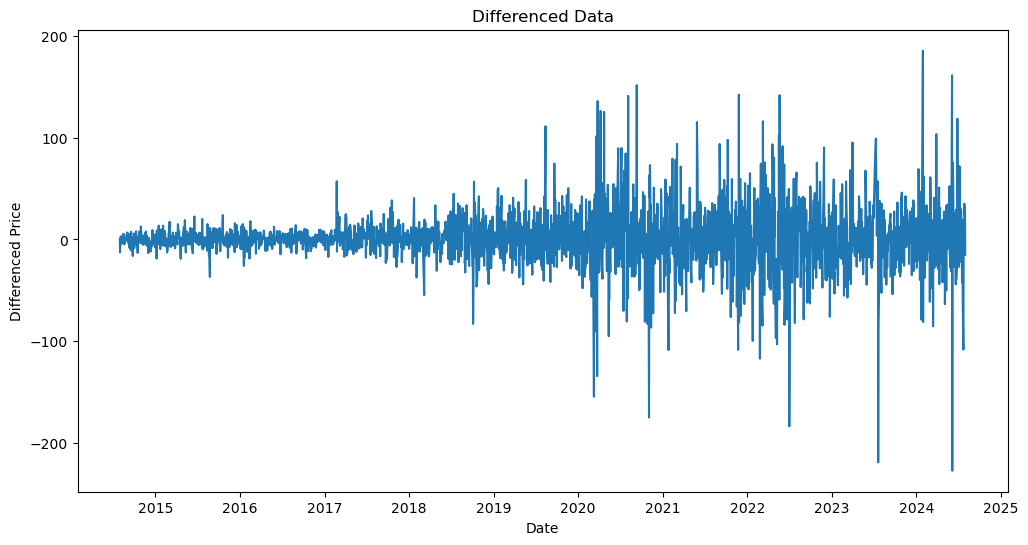

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][1:], data['Differenced_Close'][1:])
plt.title('Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.show()

## Plotting ACF and PACF

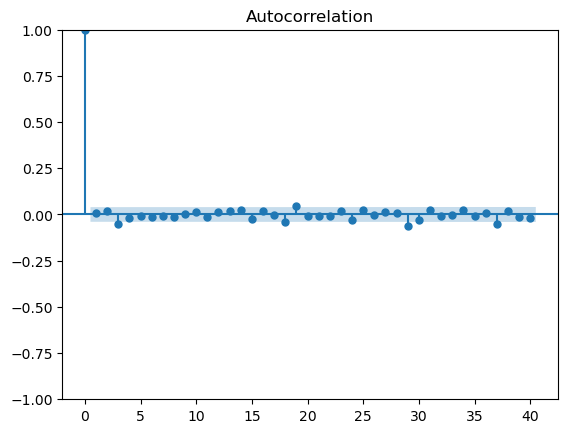

C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


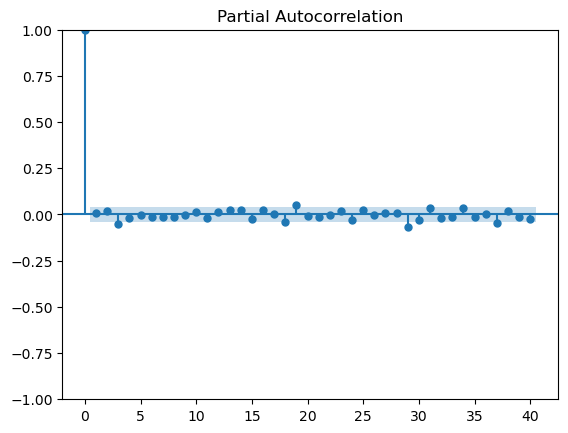

In [76]:
plot_acf(data['Differenced_Close'].dropna(), lags=40)
plt.show()

plot_pacf(data['Differenced_Close'].dropna(), lags=40)
plt.show()

## ARIMA Model on Differenced Data

C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


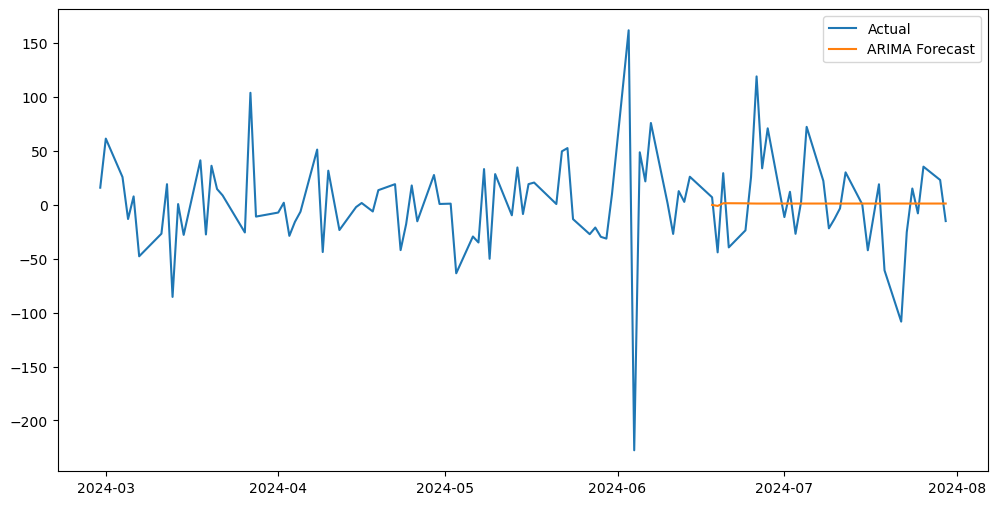

ARIMA MSE (Differenced): 1814.7699091380127


In [77]:
arima_model_diff = ARIMA(data['Differenced_Close'].dropna(), order=(5, 0, 0))
arima_fit_diff = arima_model_diff.fit()
arima_forecast_diff = arima_fit_diff.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-100:], data['Differenced_Close'][-100:], label='Actual')
plt.plot(data['Date'][-30:], arima_forecast_diff, label='ARIMA Forecast')
plt.legend()
plt.show()

arima_mse_diff = mean_squared_error(data['Differenced_Close'][-30:], arima_forecast_diff)
print(f'ARIMA MSE (Differenced): {arima_mse_diff}')

## SARIMA Model on Differenced Data

C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No suppor

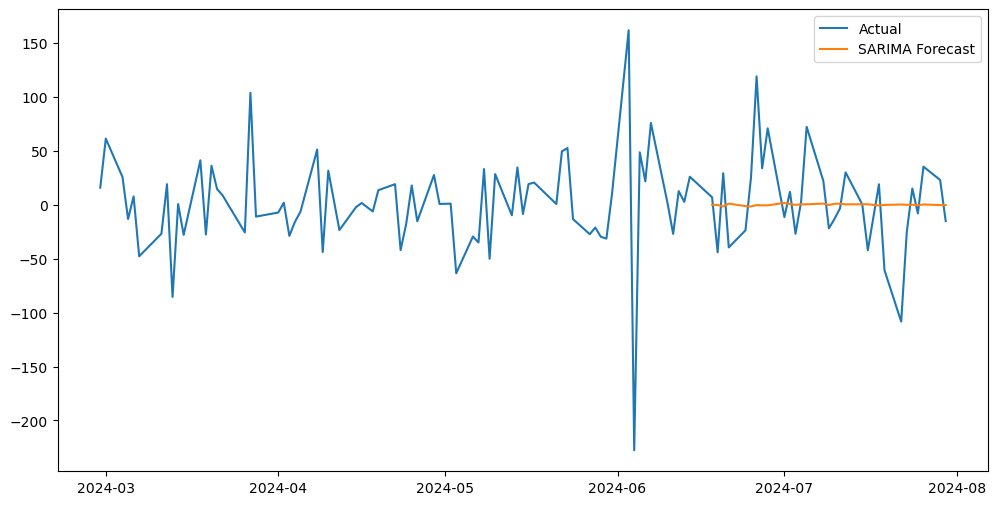

SARIMA MSE (Differenced): 1836.2602150562122


In [78]:
sarima_model_diff = SARIMAX(data['Differenced_Close'].dropna(), order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarima_fit_diff = sarima_model_diff.fit(disp=False)
sarima_forecast_diff = sarima_fit_diff.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-100:], data['Differenced_Close'][-100:], label='Actual')
plt.plot(data['Date'][-30:], sarima_forecast_diff, label='SARIMA Forecast')
plt.legend()
plt.show()

sarima_mse_diff = mean_squared_error(data['Differenced_Close'][-30:], sarima_forecast_diff)
print(f'SARIMA MSE (Differenced): {sarima_mse_diff}')

## Exponential Smoothing on Differenced Data

C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kb946\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


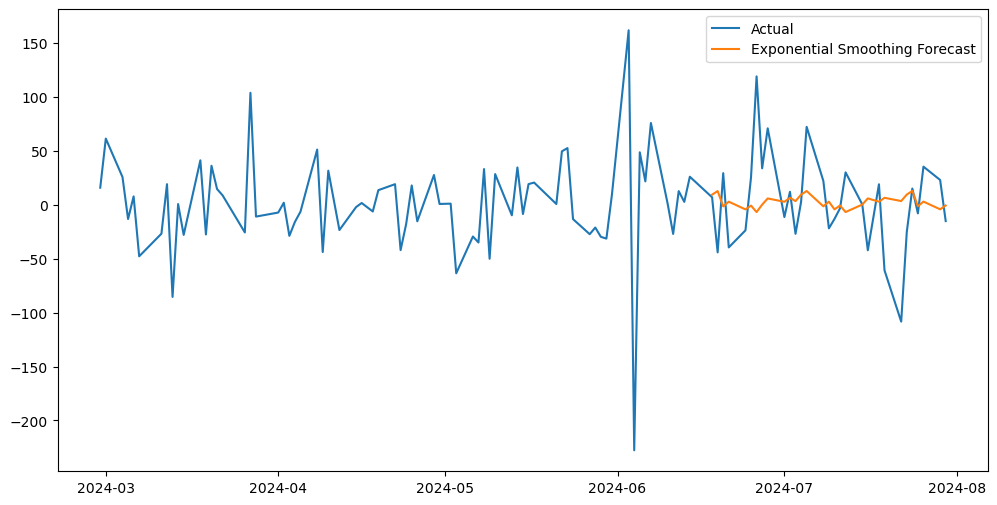

Exponential Smoothing MSE (Differenced): 1946.5285487360336


In [79]:
exp_smoothing_model_diff = ExponentialSmoothing(data['Differenced_Close'].dropna(), trend='add', seasonal='add', seasonal_periods=12)
exp_smoothing_fit_diff = exp_smoothing_model_diff.fit()
exp_smoothing_forecast_diff = exp_smoothing_fit_diff.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-100:], data['Differenced_Close'][-100:], label='Actual')
plt.plot(data['Date'][-30:], exp_smoothing_forecast_diff, label='Exponential Smoothing Forecast')
plt.legend()
plt.show()

exp_smoothing_mse_diff = mean_squared_error(data['Differenced_Close'][-30:], exp_smoothing_forecast_diff)
print(f'Exponential Smoothing MSE (Differenced): {exp_smoothing_mse_diff}')

## Compare Model Performance

In [80]:
print(f'ARIMA MSE (Differenced): {arima_mse_diff}')
print(f'SARIMA MSE (Differenced): {sarima_mse_diff}')
print(f'Exponential Smoothing MSE (Differenced): {exp_smoothing_mse_diff}')

ARIMA MSE (Differenced): 1814.7699091380127
SARIMA MSE (Differenced): 1836.2602150562122
Exponential Smoothing MSE (Differenced): 1946.5285487360336


## <b><font color='green'>Based on the Mean Squared Error (MSE) values, the ARIMA model performs the best among the three models for forecasting the differenced data. Here are the MSE values for each model:</font></b>

### ARIMA MSE (Differenced): 1814.8858
### SARIMA MSE (Differenced): 1836.2636
### Exponential Smoothing MSE (Differenced): 1946.3729